# Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from collections import Counter
import re
import string
import spacy


from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import MiniBatchKMeans
from sklearn import manifold, decomposition
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import preprocessing
from sklearn import cluster, metrics

import tensorflow
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

import random
import mglearn
from spacy.lang.en import English

from PIL import Image, ImageOps, ImageFilter
import time
import os
from os import listdir
from matplotlib.image import imread

# Chargement du fichier

In [2]:
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [3]:
data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [4]:
data.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

On vérifie la présence ou non de doublons :

In [5]:
data.duplicated().sum()

0

# Valeurs manquantes :

In [6]:
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

Des valeurs manquantes sont observées pour la colonne "brand". Ces valeurs manquantes ne nous impacteront pas pour la suite de notre étude puisque cette colonne ne nous servira pas pour notre analyse.
Nous en profitons d'ailleurs pour cleaner notre dataset en supprimant les colonnes inutiles à notre analyse :

# Suppression des colonnes inutiles à l'analyse 

In [7]:
data = data.drop(['crawl_timestamp','product_url','pid', 'retail_price','discounted_price',
                          'is_FK_Advantage_product','product_rating','overall_rating','brand','product_specifications'], 1)

C:\Users\nha5600\AppData\Local\Temp/ipykernel_16136/903394893.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['crawl_timestamp','product_url','pid', 'retail_price','discounted_price',


# Analyse de la colonne catégories

Nous commençons d'abord par comptabiliser le nombre de catégories uniques :

In [8]:
print("Nombre de catégories :{}".format(data['product_category_tree'].nunique()))

Nombre de catégories :642


In [9]:
data[["product_category_tree","description"]].head()

,product_category_tree,description
0,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...
4,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...


In [10]:
data.loc[0, "product_category_tree"].split(">>")

['["Home Furnishing ',
 ' Curtains & Accessories ',
 ' Curtains ',
 ' Elegance Polyester Multicolor Abstract Eyelet Do..."]']

In [11]:
data.loc[0, "description"]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

Le but ici est de sélectionner à quelle étape de l'arborescence des catégories on peut trouver une information pertinente pour catégoriser le produit. 
Les étapes doivent être sans valeur manquante, suffisamment différentes mais pas trop spécifiques.Nous allons extraire de la colonne product_category_tree les 3 premières sous-catégories.

In [12]:
#Sous catégorie 1
data["category_1"] = data["product_category_tree"].apply(lambda x: x.split('["')[1].split('"]')[0].split(">>")[0])

In [13]:
#Sous catégorie 2
data["category_2"] = data["product_category_tree"].apply(lambda x: x.split('["')[1].split('"]')[0].split(">>")[1])

In [14]:
#Sous catégorie 3
data["category_3"] = data["product_category_tree"].apply(lambda x: x.split('["')[1].split('"]')[0].split(">>")[2]
if len(x.split(">>")) > 2
else None)

In [15]:
data[['product_category_tree', 'category_1', 'category_2', 'category_3']]

,product_category_tree,category_1,category_2,category_3
0,"[""Home Furnishing >> Curtains & Accessories >>...",Home Furnishing,Curtains & Accessories,Curtains
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Baby Care,Baby Bath & Skin,Baby Bath Towels
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Baby Care,Baby Bath & Skin,Baby Bath Towels
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Home Furnishing,Bed Linen,Bedsheets
4,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Home Furnishing,Bed Linen,Bedsheets
...,...,...,...,...
1045,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Baby Care,Baby & Kids Gifts,Stickers
1046,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Baby Care,Baby & Kids Gifts,Stickers
1047,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Baby Care,Baby & Kids Gifts,Stickers
1048,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Baby Care,Baby & Kids Gifts,Stickers


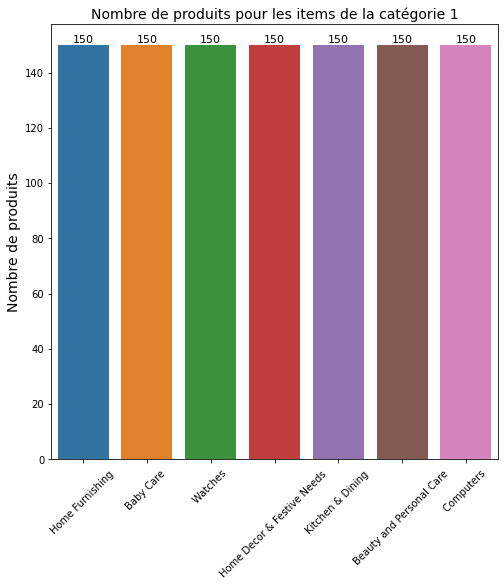

In [16]:
# On commence par faire le comptage de la sous catégorie 1
plt.figure(figsize=(8, 8))
    
plt.xticks(rotation=45)

val = data["category_1"].value_counts()
val = pd.DataFrame(val)

sns.barplot(x=val.index, y=val["category_1"])

plt.ylabel("Nombre de produits", size=14)
plt.title('Nombre de produits pour les items de la catégorie 1', size = 14)

for i, v in enumerate(val["category_1"].values):
    plt.text(i, v+1, v, color='black', ha='center', size=11)

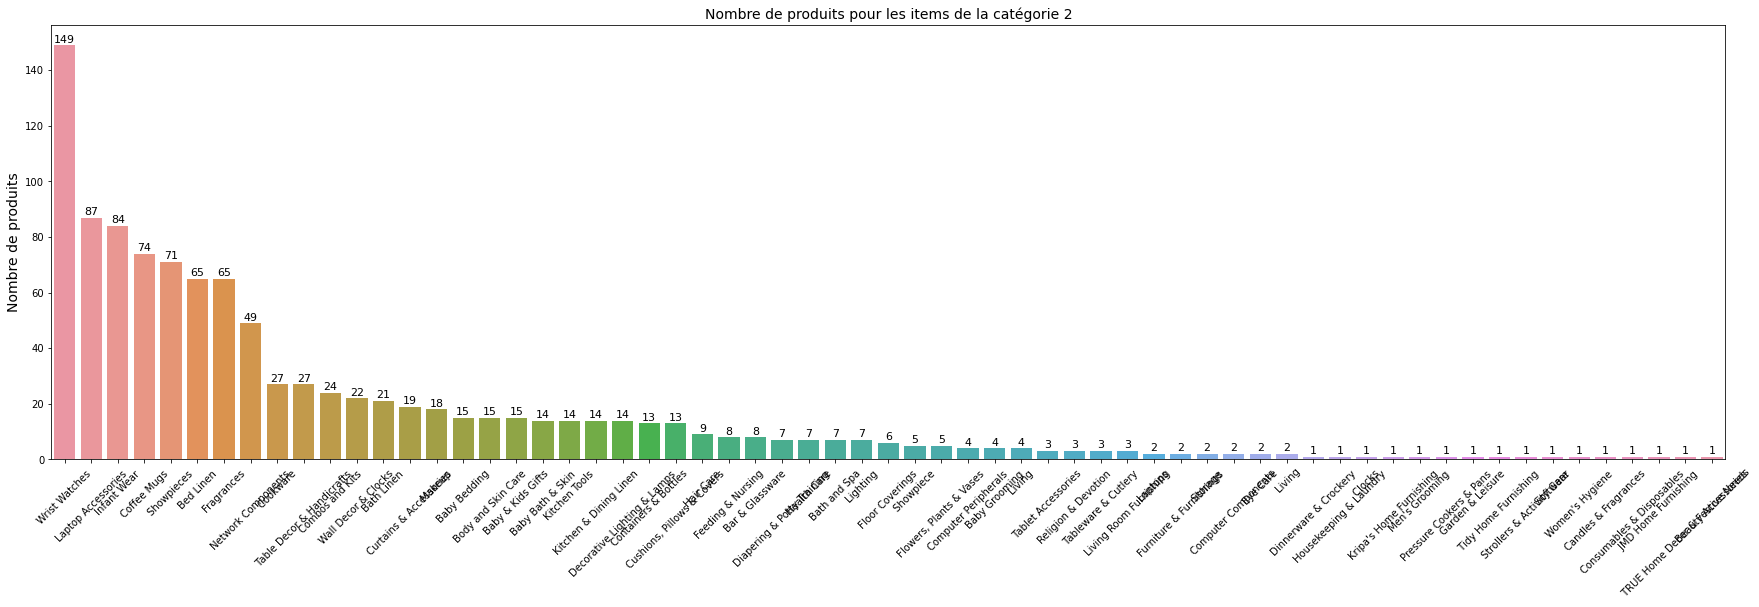

In [17]:
# On continue par le comptage de la sous catégorie 2
plt.figure(figsize=(30, 8))
    
plt.xticks(rotation=45)

val2 = data["category_2"].value_counts()
val2 = pd.DataFrame(val2)

sns.barplot(x=val2.index, y=val2["category_2"])

plt.ylabel("Nombre de produits", size=14)
plt.title('Nombre de produits pour les items de la catégorie 2', size = 14)

for i, v in enumerate(val2["category_2"].values):
    plt.text(i, v+1, v, color='black', ha='center', size=11)

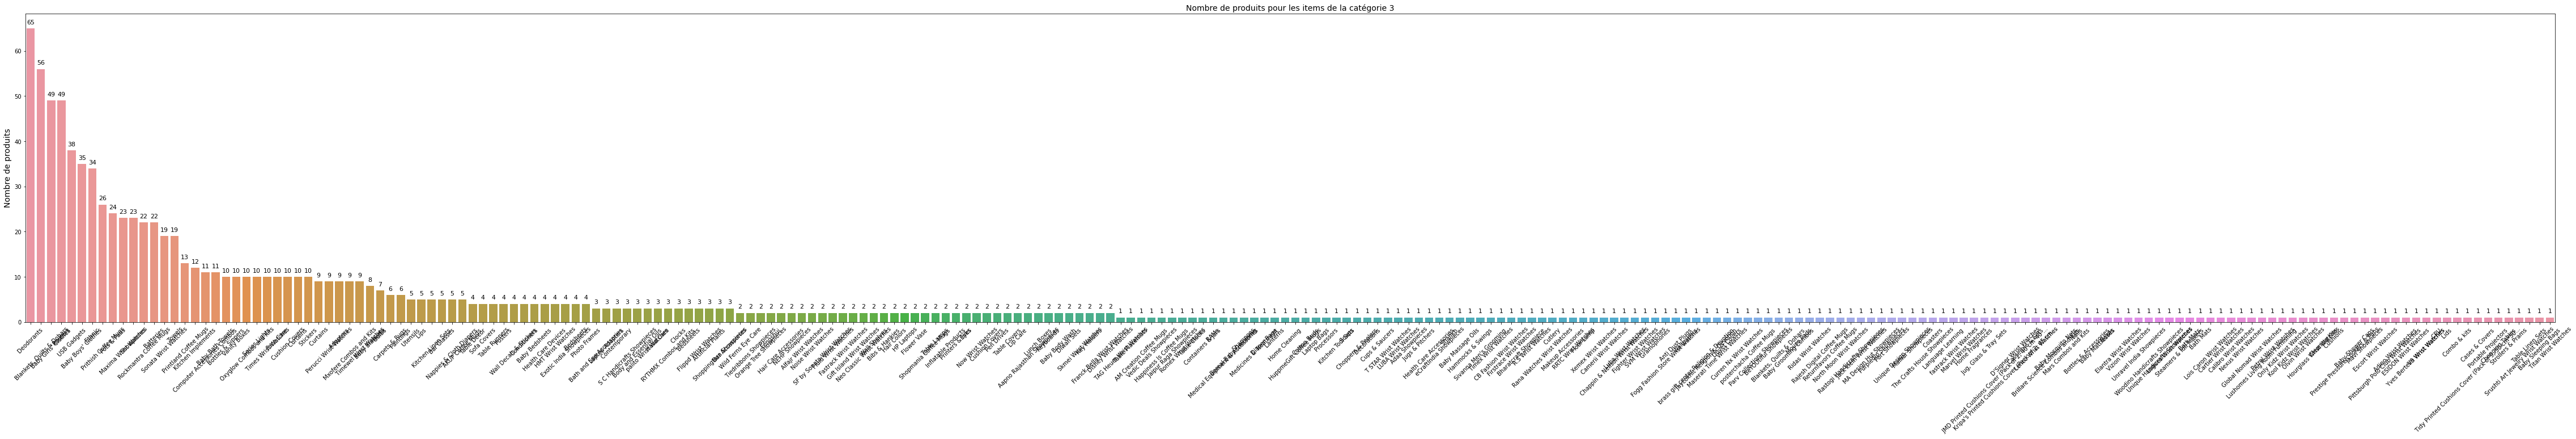

In [18]:
# On continue par le comptage de la sous catégorie 3
plt.figure(figsize=(80, 10))
    
plt.xticks(rotation=45)

val3 = data["category_3"].value_counts()
val3 = pd.DataFrame(val3)

sns.barplot(x=val3.index, y=val3["category_3"])

plt.ylabel("Nombre de produits", size=14)
plt.title('Nombre de produits pour les items de la catégorie 3', size = 14)

for i, v in enumerate(val3["category_3"].values):
    plt.text(i, v+1, v, color='black', ha='center', size=11)

Trop de catégories sont représentées dans les sous-catégories 2 et 3. Nous décidons donc de nous consacrer à la sous-catégorie 1 pour la suite de notre étude.

# Nettoyage du texte : Fonctions

Je vais d'abord nettoyer la description en utilisant la technique NLP : tokennisation, lemmanisation, supprimer stopwords.
Le processus de transformation d’un texte en une liste de mots est appelé tokenization, et les mots sont appelés tokens. En d’autres termes, la tokenization découpe un texte en plusieurs morceaux 'des tokens'

La lemmatisation est le processus de réduction de multiples variantes d’un mot à son lemme unique. Elle est plus lisible et interprétable et moins brutale que le stemming. Elle est aussi plus lente.

In [19]:
#Fonction pour nettoyer chaque description
def clean_text(text):
    
    #On Convertit tous les caractères en minuscules
    text = text.lower()

    # On enlève les signes de ponctuation
    text = re.sub(r'(?<=[.,])(?=[^\s])', r' ', text)
    text = ''.join([word for word in text if word not in string.punctuation])
    

    # On enlève les signes de ponctuation (URL) :
    text = re.sub(r'http.+?(?="|<)',
                  repl='',
                  string=text)

    # On enlève les chiffres:
    text = ''.join([word for word in text if word not in string.digits])

    # On enlève les espaces :
    text = re.sub(' +', ' ', text)

    return text

In [20]:
# Première visualisation du nettoyage du texte
data['description_traitée'] = data['description'].apply(lambda txt : clean_text(txt))
data['description_traitée'].head(10)

0    key features of elegance polyester multicolor ...
1    specifications of sathiyas cotton bath towel b...
2    key features of eurospa cotton terry face towe...
3    key features of santosh royal fashion cotton p...
4    key features of jaipur print cotton floral kin...
5    maserati time r analog watch for boys buy mase...
6    camerii wm elegance analog watch for men boys ...
7    t star ufttswbkbr analog watch for boys\r\n pr...
8    alfajr wyb youth digital watch for men boys bu...
9    tag heuer cau ba formula analog watch for boys...
Name: description_traitée, dtype: object

Pour le nettoyage, on procède également à la lemmatisation et a la tokenisation :

In [21]:
# On crée une fonction pour la lemmatisation des descriptions :
nlp = spacy.load('en_core_web_sm')

def lemmatize(text):
    # On toekenise chaque description : 
    doc = nlp(text)
    # On lemmanise chaque token :
    tokens = [token.lemma_ for token in doc] 
    return ' '.join(tokens)

data['description_traitée'] = data['description_traitée'].apply(lambda txt : lemmatize(txt))
data['description_traitée'].head(10)

0    key feature of elegance polyester multicolor a...
1    specification of sathiyas cotton bath towel ba...
2    key feature of eurospa cotton terry face towel...
3    key feature of santosh royal fashion cotton pr...
4    key feature of jaipur print cotton floral king...
5    maserati time r analog watch for boy buy maser...
6    camerii wm elegance analog watch for man boy b...
7    t star ufttswbkbr analog watch for boy \r\n  p...
8    alfajr wyb youth digital watch for man boy buy...
9    tag heuer cau ba formula analog watch for boy ...
Name: description_traitée, dtype: object

Les stopwords sont des mots qui ne fournissent aucune information utile pour déduire le contenu ou la nature. Cela peut être soit parce qu’ils n’ont pas de sens (prépositions, conjonctions, etc.) soit parce qu’ils sont trop fréquents

In [22]:
from string import punctuation

stop_words = set(nltk.corpus.stopwords.words('english'))

def remove_stopwords(text: str, stop_words: list):
    words = [word for word in text.split() if word.lower() not in stop_words]

    return ' '.join(words)

data.description_traitée = data.description_traitée.apply(lambda x: remove_stopwords(x, stop_words))

In [23]:
data['description_traitée']

0       key feature elegance polyester multicolor abst...
1       specification sathiyas cotton bath towel bath ...
2       key feature eurospa cotton terry face towel se...
3       key feature santosh royal fashion cotton print...
4       key feature jaipur print cotton floral king si...
                              ...                        
1045    oren empower extra large self adhesive sticker...
1046    wallmantra large vinyl sticker sticker pack pr...
1047    buy uberlyfe extra large pigmented polyvinyl f...
1048    buy wallmantra medium vinyl sticker sticker rs...
1049    buy uberlyfe large vinyl sticker rs online ube...
Name: description_traitée, Length: 1050, dtype: object

In [24]:
data[["description", "description_traitée"]].head()

,description,description_traitée
0,Key Features of Elegance Polyester Multicolor ...,key feature elegance polyester multicolor abst...
1,Specifications of Sathiyas Cotton Bath Towel (...,specification sathiyas cotton bath towel bath ...
2,Key Features of Eurospa Cotton Terry Face Towe...,key feature eurospa cotton terry face towel se...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,key feature santosh royal fashion cotton print...
4,Key Features of Jaipur Print Cotton Floral Kin...,key feature jaipur print cotton floral king si...


 On vérifie visuellement s’il n’y a pas d’autres mots "trop communs" à ajouter pour notre stopwords avec un nuage de mots :

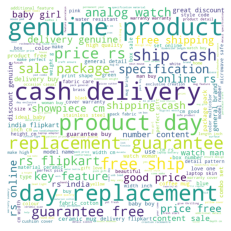

In [25]:
long_string = ','.join(data['description_traitée'].values)
wordcloud = WordCloud(background_color="white",
                      max_words=200,
                      contour_width=3,
                      width=1000,
                      height=1000,
                      contour_color='steelblue')
wordcloud.generate(long_string)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Création d’une liste de stopwords personnalisés


Ces stopwords ont été obtenus grâce au WordCloud et à notre librairie qui nous a proposé des mots en plus (verbes conjugués). Ces mots n'auront aucune influence sur notre analyse textuelle et nous pouvons les enlever du dataset :  

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

new_words =  ['product', 'free', 'cm', 'buy', 'delivery',
              'shipping', 'genuine', 'cash', 'price', 'replacement',
              'day', 'flipkart', 'guarantee', 'feature', 
              'online', 'specification', 'color', 'type', 'material',
              'general', 'number', 'brand', 'best', 'key', 'size',
              'dimension', 'sale', 'discount', 'pack', 'package', 'box',
              'rs', 'india', 'great', 'gift', 'abstract', 'ideal', 'love', 'one', 'design', 'set', 'com', 'ship', 'arent', 
              'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 
              'shouldnt', 'shouldve', 'thatll', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve']

stop_words = stop_words.union(new_words)

# Suppression des nouveaux stopwords : 
data['description_traitée'] = data['description_traitée'].apply(lambda x: remove_stopwords(x, stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nha5600\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


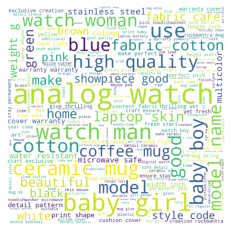

In [27]:
# Visualisation du nouveau nuage de mots :
long_string = ','.join(data['description_traitée'].values)
wordcloud = WordCloud(background_color="white",
                      max_words=200,
                      contour_width=3,
                      width=1000,
                      height=1000,
                      contour_color='steelblue')
wordcloud.generate(long_string)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

On se retrouve donc après notre nettoyage avec les mots les plus présents qui ne sont pas forcément communs et peuvent nous servir dans notre analyse.

# Encoder

On encode la variable catégorielle "catégorie 1" pour faciliter nos analyses. Ainsi, il n'y aura aucune hiérarchie entre nos catégories

In [28]:
from sklearn.preprocessing import LabelEncoder

C1 = data['category_1']

transformer = LabelEncoder()
data.insert(0, 'categ', transformer.fit_transform(C1))   # les 2 en 1
data.head(6)

,categ,uniq_id,product_name,product_category_tree,image,description,category_1,category_2,category_3,description_traitée
0,4,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,Curtains,elegance polyester multicolor eyelet door curt...
1,0,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,Baby Bath Towels,sathiyas cotton bath towel bath towel red yell...
2,0,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,Baby Bath Towels,eurospa cotton terry face towel small height i...
3,4,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,Bedsheets,santosh royal fashion cotton print king double...
4,4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,Bedsheets,jaipur print cotton floral king double bedshee...
5,6,893aa5ed55f7cff2eccea7758d7a86bd,Maserati Time R8851116001 Analog Watch - For ...,"[""Watches >> Wrist Watches >> Maserati Time Wr...",893aa5ed55f7cff2eccea7758d7a86bd.jpg,Maserati Time R8851116001 Analog Watch - For ...,Watches,Wrist Watches,Maserati Time Wrist Watches,maserati time r analog watch boy maserati time...


# Bag of words

On commence par utiliser le bag of words, méthode de nettoyage de texte, puis on clusterise et on trace la matrice de confusion correspondante.
Son principe se résume en 3 phases : La décomposition des mots, la constitution d’un dictionnaire global qui sera en fait le vocabulaire, l’encodage des chaînes de caractère par rapport au vocabulaire constitué précédemment. L’objectif est de créer des « features » pour chaque produit.

In [29]:
# création du bag of words (CountVectorizer)

from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(preprocessor=clean_text, stop_words=stop_words , max_df=0.95, min_df=1)

feat = 'description_traitée'

cv_fit = cvect.fit(data[feat])

cv_transform = cvect.transform(data[feat])

cvbow = cv_transform.toarray()

bow_df = pd.DataFrame(cv_transform.toarray(), columns=cvect.get_feature_names())

C:\Users\nha5600\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


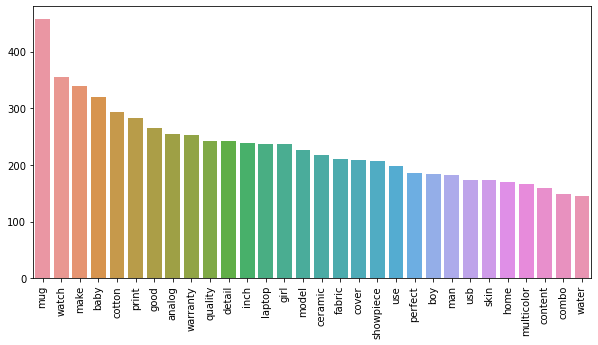

In [30]:
plt.figure(figsize=(10, 5))
occ = sns.barplot(data=bow_df.sum().sort_values(ascending=False).to_frame().head(30).T)
for item in occ.get_xticklabels():
    item.set_rotation(90)

# Clusterisation

In [31]:
from sklearn.cluster import KMeans

X_BW = cvbow

km = KMeans(n_clusters=7, init='k-means++', n_init=20)
km.fit(X_BW)

# Récupération des clusters attribués à chaque produit
clusters_BW = km.labels_    

set(clusters_BW)

{0, 1, 2, 3, 4, 5, 6}

In [32]:
data['cluster'] = clusters_BW    # Association du cluster à chaque produit
data.head(3)

,categ,uniq_id,product_name,product_category_tree,image,description,category_1,category_2,category_3,description_traitée,cluster
0,4,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,Curtains,elegance polyester multicolor eyelet door curt...,2
1,0,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,Baby Bath Towels,sathiyas cotton bath towel bath towel red yell...,2
2,0,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,Baby Bath Towels,eurospa cotton terry face towel small height i...,2


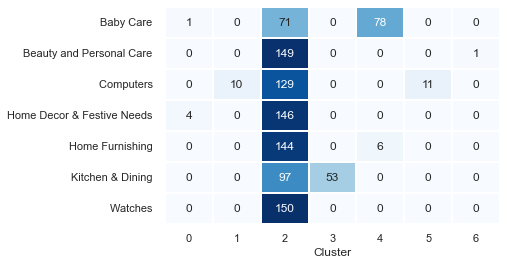

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set()
cm = confusion_matrix(data['categ'], data['cluster'])

df_cm = pd.DataFrame(cm, columns=np.unique(data['categ']), index = np.unique(data['category_1']))
df_cm.columns.name = 'Cluster'

ax = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", linewidths=2, cbar=False)

On voit que la méthode ne se révèle pas très efficace, puisque les clusters n'arrivent pas à bien identifier les différentes catégories. 

# TF-IDF

On continue avec le TF-IDF. Le TF-IDF est une méthode de pondération souvent utilisée en recherche d'information et en particulier dans la fouille de textes. Cette mesure statistique permet d'évaluer l'importance d'un terme contenu dans un document, relativement à une collection ou un corpus

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

ctf = TfidfVectorizer(preprocessor=clean_text, stop_words=stop_words, max_df=0.95, min_df=1)

feat = 'description_traitée'

ctf_fit = ctf.fit(data[feat])

ctf_transform = ctf.transform(data[feat])

tfidf = pd.DataFrame(ctf_transform.toarray(), columns=ctf.get_feature_names())

C:\Users\nha5600\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


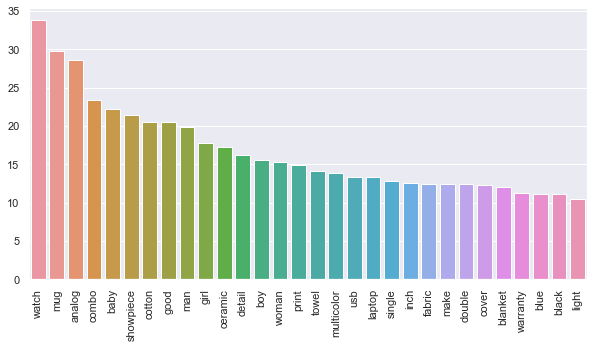

In [35]:
plt.figure(figsize=(10, 5))
occ = sns.barplot(data=tfidf.sum().sort_values(
    ascending=False).to_frame().head(30).T)
for item in occ.get_xticklabels():
    item.set_rotation(90)

# Clusterisation

In [36]:
from sklearn.cluster import KMeans

ctfbow = ctf_transform.toarray()
X = ctfbow

km = KMeans(n_clusters=7, init='k-means++', n_init=20)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters_TF = km.labels_   

set(clusters_TF)

{0, 1, 2, 3, 4, 5, 6}

In [37]:
data['cluster'] = clusters_TF   # Association du cluster à chaque produit
data.head(3)

,categ,uniq_id,product_name,product_category_tree,image,description,category_1,category_2,category_3,description_traitée,cluster
0,4,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,Curtains,elegance polyester multicolor eyelet door curt...,1
1,0,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,Baby Bath Towels,sathiyas cotton bath towel bath towel red yell...,1
2,0,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,Baby Bath Towels,eurospa cotton terry face towel small height i...,1


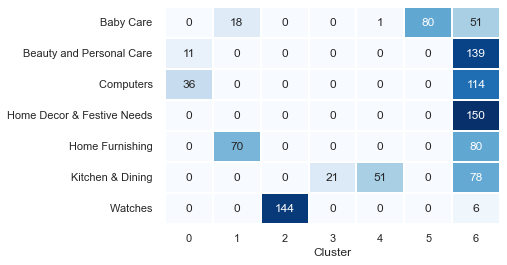

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set()
cm = confusion_matrix(data['categ'], data['cluster'])

df_cm = pd.DataFrame(cm, columns=np.unique(data['categ']), index = np.unique(data['category_1']))
df_cm.columns.name = 'Cluster'

ax = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", linewidths=2, cbar=False)

Avant de passer à la comparaison entre bag of words et tfidf, on définit nos fonctions pour les calculs de l'ARI, des clusters et du TSNE. Nous effectuons donc une réduction dimensionnelle par le TSNE , puis nous déterminons les clusters à partir des données après TSNE.

In [39]:
import time
l_cat = list(set(data['category_1']))
y_cat_num = [(1-l_cat.index(data.iloc[i]['category_1'])) for i in range(len(data))]

def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.xlabel('tsne1', fontweight = 'bold')
    plt.ylabel('tsne2', fontweight = 'bold')
    plt.title('Représentation des produits par catégories')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    plt.xlabel('tsne1', fontweight = 'bold')
    plt.ylabel('tsne2', fontweight = 'bold')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

# Comparaison Bag of words/TDIDF

In [40]:
print("Bag of words : ")
print("-----------------")
ARI_bow, X_tsne_bow, labels_bow = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI_tf, X_tsne_tf, labels_tf = ARI_fct(ctf_transform)

Bag of words : 
-----------------
ARI :  0.4505 time :  21.0

Tf-idf : 
--------
ARI :  0.5394 time :  14.0


On constate un meilleur ARI pour l'approche TF-IDF, et cela prend moins de temps aussi. Voyons voir maintenant la répartition des catégories par classes et par clusters pour le bag of words :

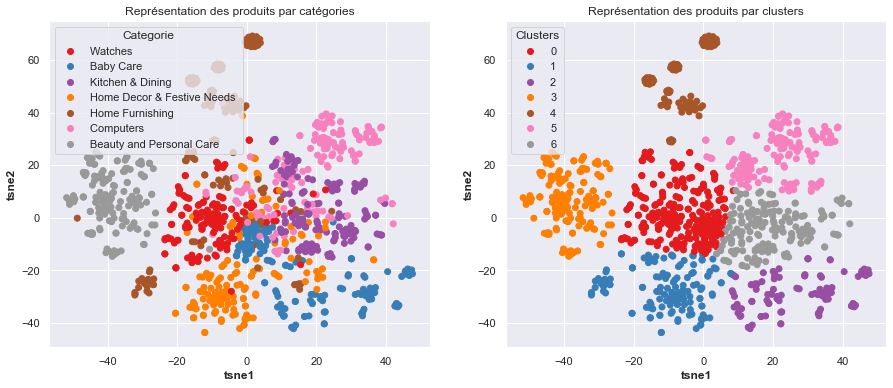

ARI :  0.4505


In [41]:
 TSNE_visu_fct(X_tsne_bow, y_cat_num, labels_bow, ARI_bow)

Voyons voir maintenant la répartition des catégories par classes et par clusters pour le TF-IDF :

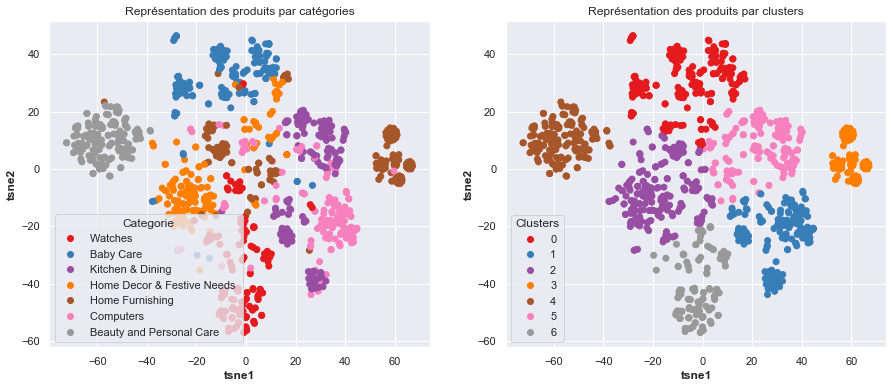

ARI :  0.5394


In [42]:
 TSNE_visu_fct(X_tsne_tf, y_cat_num, labels_tf, ARI_tf)

On crée notre variable X, qui pourrait nous servir pour la suite 

In [43]:
vect = TfidfVectorizer(min_df=3,
                norm=None,
                stop_words=stop_words,
                ngram_range=(1,2))

X = vect.fit_transform(data.description_traitée)

# Word2Vec

Word2vec est une sorte d’ACP non linéaire dans le sens qu’il réduit les dimensions, et car il prend en compte le contexte mais ne s’en éloigne pas tant que ce ça.
On crée un tableau contenant le mot de la description :

In [44]:
sentences = data.description_traitée.apply(lambda x: x.split())

On importe Word2Vec model from gensim

In [45]:
from gensim.models import Word2Vec

Pour la création de notre modèle, nous nous basons sur les variables suivantes :
 * min_count=3 : On ignore les mots qui apparaissent moins que 3 fois
 * vector_size=300 : La taille du vecteur est 300 
 * window=7 :  Fenêtre contextuelle pour les mots pendant le training 
 * maxlen=24 : La longueur des phrases n'excède pas 24

In [46]:
# Model creation
model = Word2Vec(sentences,
                 min_count=3, 
                 vector_size=300, 
                 sg = 1,        
                 window=7)

In [47]:
model.wv.most_similar('watch')

[('analog', 0.9917764067649841),
 ('man', 0.9847043752670288),
 ('digital', 0.9678793549537659),
 ('timewel', 0.9668711423873901),
 ('maxima', 0.9646433591842651),
 ('sonata', 0.9597388505935669),
 ('decker', 0.9512774348258972),
 ('tms', 0.9484825134277344),
 ('perucci', 0.9422427415847778),
 ('sl', 0.9417678713798523)]

In [48]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

In [49]:
w2v_size=300
w2v_window=7
w2v_min_count=1
w2v_epochs=100
maxlen = 24 
sentences = data['description_traitée'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [50]:
# Création et entraînement du modèle Word2Vec

print("Création et entrainement du modèle Word2Vec")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Taille du vocabulaire: %i" % len(w2v_words))
print("Word2Vec entrainé")

Création et entrainement du modèle Word2Vec
Taille du vocabulaire: 4527
Word2Vec entrainé


In [51]:
# Préparation des sentences (tokenization)

print("Préparation des sentences")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Nombre de mots uniques: %i" % num_words)

Préparation des sentences
Nombre de mots uniques: 4528


In [52]:
# Création de la matrice d'embedding

print("Création de la matrice d'embedding")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Taux du Word embedding : ", word_rate)
print("Matrice d'embedding: %s" % str(embedding_matrix.shape))

Création de la matrice d'embedding
Taux du Word embedding :  1.0
Matrice d'embedding: (4528, 300)


In [53]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1358400   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,358,400
Trainable params: 1,358,400
Non-trainable params: 0
_________________________________________________________________


In [54]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

(1050, 300)

De la même manière que pour bag of words, on calcule nos métriques :

In [55]:
ARI_w2v, X_tsne_w2v, labels_w2v = ARI_fct(embeddings)

ARI :  0.5156 time :  17.0


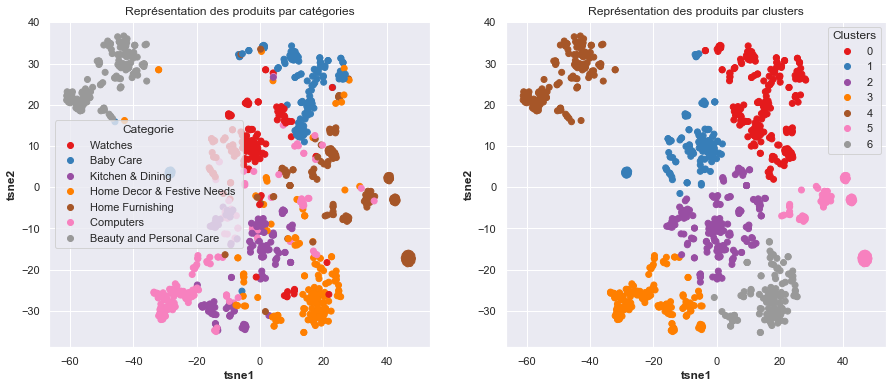

ARI :  0.5156


In [56]:
TSNE_visu_fct(X_tsne_w2v, y_cat_num, labels_w2v, ARI_w2v)

# BERT

Les modèles de deep learning comme BERT et USE traitent les mots dans le contexte de leur phrases

BERT : Bidirectional Encoder Representations from Transformers / USE : Universal Sentence Encoder
Avec BERT et USE, il ne faut pas trop traiter les textes, sinon, on perd le contexte (racine, lemmatisation) ou modifier purement et simplement les textes (suppression des mots vides).

Les descriptions des produits semblent déjà traitées, donc on essaye d'eviter de supprimer les stopwords et lemmatization.

On crée également une dataframe df pour traiter particulièrement ces cas.

In [57]:
df = data.copy()

In [58]:
# Fonction de préparation du texte pour le Deep learning (USE et BERT)
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

df['sentence_dl'] = df['description'].apply(lambda x : transform_dl_fct(x))

In [59]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import TFBertModel, AutoTokenizer, TFAutoModel

os.environ["TF_KERAS"]='1'

In [60]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.8.0
2.8.0
Num GPUs Available:  0
True


# Fonctions communes

In [61]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

On choisit notre modèle 

In [62]:
from transformers import TFAutoModel
model = TFAutoModel.from_pretrained('bert-base-uncased')

max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df['sentence_dl'].to_list()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are in

On crée nos features :

In [63]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

temps traitement :  136.0


On calcule l'ARI :

In [64]:
ARI_bert, X_tsne_bert, labels_bert = ARI_fct(features_bert)

ARI :  0.3269 time :  13.0


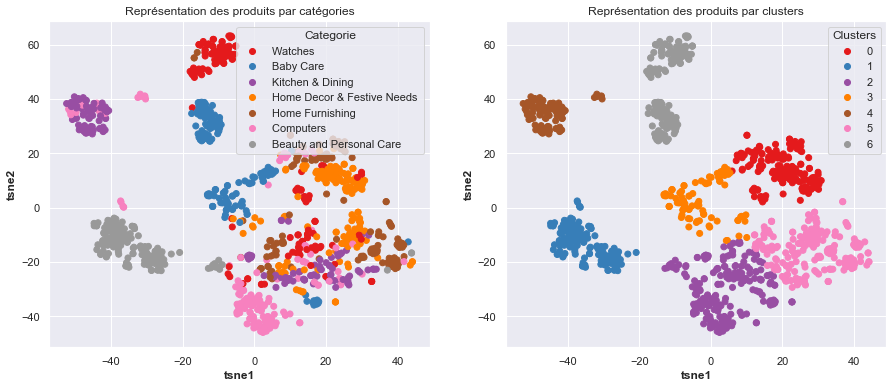

ARI :  0.3269


In [65]:
TSNE_visu_fct(X_tsne_bert, y_cat_num, labels_bert, ARI_bert)

# USE - Universal Sentence Encoder

Le USE encode le texte en vecteurs de haute dimension qui peuvent être utilisés pour la classification du texte, la similarité sémantique, le regroupement et d’autres tâches de langage naturel. Le USE pré-formé est publiquement disponible dans Tensorflow-hub.

In [66]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

#USE
import transformers
from transformers import *

In [98]:
pip install --upgrade tensorflow-hub

In [67]:
import tensorflow_hub as hub

os.environ["TF_KERAS"] = '1'
USE_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
# 1Gb model
embed = hub.load(USE_model_url)

Après ces premieres étapes, nous raisonnons de la même manière que pour BERT :

In [68]:
def feature_USE_fct(sentences, b_size):
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size):
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step == 0:
            features = feat
        else:
            features = np.concatenate((features, feat))

    time2 = np.round(time.time() - time1, 0)
    print(f'feature_USE_fct, time_taken = {time2} s')
    return features

In [69]:
batch_size = 10

In [70]:
features_USE = feature_USE_fct(sentences, batch_size)

feature_USE_fct, time_taken = 1.0 s


On calcule l'ARI, de la même manière que nous l'avons fait pour les premières méthodes :

In [71]:
ARI_use, X_tsne_use, labels_use = ARI_fct(features_USE)

ARI :  0.4409 time :  16.0


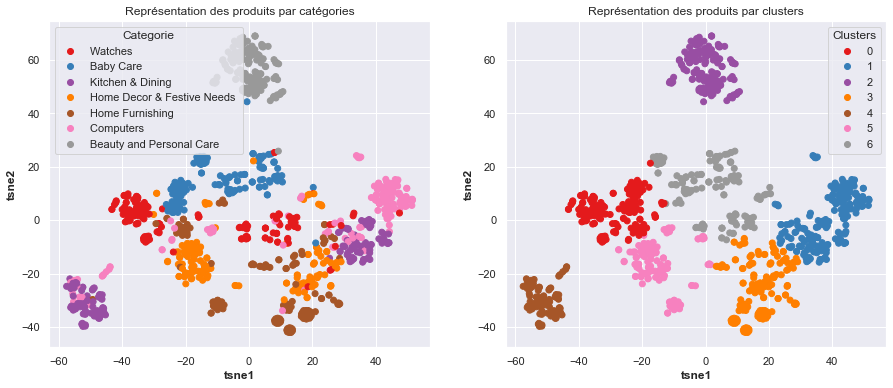

ARI :  0.4409


In [72]:
TSNE_visu_fct(X_tsne_use, y_cat_num, labels_use, ARI_use)

# Comparaison

On compare tous les ARI de tous nos modèles. Dans notre nouveau dataframe, et pour analyse, nous mettrons également les labels et les tsne.

In [73]:
comparaison = pd.DataFrame({'Modèle': ['Bag of Words', 'TF-IDF','Word2Vec', 'Bert', 'USE'],'ARI':[ARI_bow,ARI_tf,ARI_w2v,ARI_bert,ARI_use],
                            'TSNE':[X_tsne_bow, X_tsne_tf,X_tsne_w2v,X_tsne_bert,X_tsne_use],
                            'labels':[labels_bow,labels_tf,labels_w2v,labels_bert,labels_use]})

In [74]:
comparaison

,Modèle,ARI,TSNE,labels
0,Bag of Words,0.4505,"[[30.992992, 10.102793], [11.039648, 22.871542...","[5, 5, 5, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
1,TF-IDF,0.5394,"[[16.328669, -24.499447], [28.580044, -39.8817...","[1, 1, 1, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
2,Word2Vec,0.5156,"[[-4.719781, -34.556038], [-10.601303, -26.121...","[3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
3,Bert,0.3269,"[[21.014566, -21.329754], [13.642512, -19.8441...","[5, 2, 2, 2, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, ..."
4,USE,0.4409,"[[36.479744, -14.633697], [35.030075, -2.47815...","[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."


Text(0.5, 1.0, 'Comparaison des performances ARI en fonction du modèle')

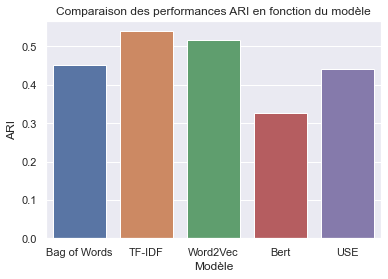

In [75]:
plt.figure()
sns.barplot(x = comparaison['Modèle'],
            y = comparaison['ARI'])
plt.title('Comparaison des performances ARI en fonction du modèle')

Nous pouvons donc regrouper les produits d'une même catégorie.

# Analyse des images

On importe nos librairies :

In [76]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import PIL
import cv2
import pydot
import graphviz

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

On importe de nouveau notre fichier :

In [77]:
df = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [78]:
import os
from os import listdir
path = r'C:/Users/nha5600/Desktop/Flipkart/Images/'
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


# Analyse d'une image aléatoire

In [79]:
import cv2

# Chargement de l'image aléatoire
img = cv2.imread(r'C:/Users/nha5600/Desktop/Flipkart/Images/0b793c1727ef52285a25dedf8b86626b.jpg',1)
cv2.imshow("Original image",img)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))

In [80]:
# On convertit les couleurs du BGR au LAB
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

In [81]:
# On divise le lab sur trois canaux différents
l, a, b = cv2.split(lab)

# On applique le CLAHE sur le canal "l"
l2 = clahe.apply(l)  

# On effectue un "merge" des canaux
lab = cv2.merge((l2,a,b)) 

# On convertit les couleurs du LAB au BGR
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

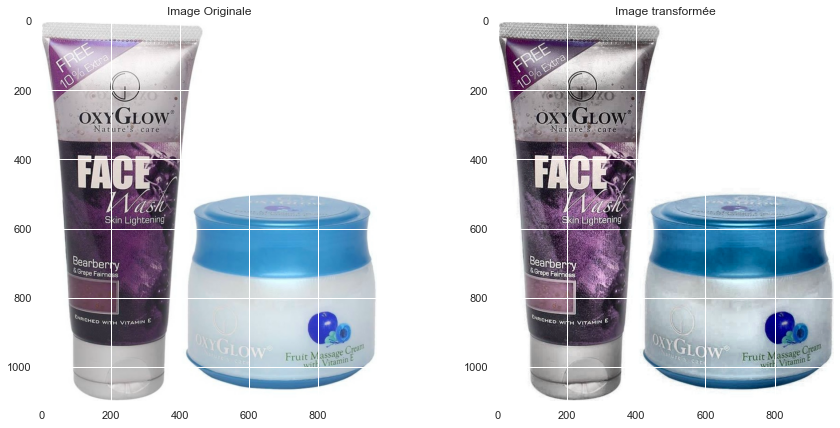

In [82]:
# Affichage de l'image d'entrainement et de l'image test
import matplotlib.pyplot as plt
fx, plots = plt.subplots(1, 2, figsize=(15, 7))

plots[0].set_title("Image Originale")
plots[0].imshow(img)

plots[1].set_title("Image transformée")
plots[1].imshow(img2)

On constate qu'avec la transformation de notre image, le contraste a été largement amélioré. Nous pouvons utiliser cela pour la suite de nos analyses :

In [83]:
list_labels = ['home furnishing', 'baby care', 'watches',
       'home decor & festive needs', 'kitchen & dining',
       'beauty and personal care', 'computers']

In [84]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [85]:
df["category_1"] = df["product_category_tree"].apply(lambda x: x.split('["')[1].split('"]')[0].split(">>")[0])

In [86]:
from sklearn.preprocessing import LabelEncoder

C1 = df['category_1']

transformer = LabelEncoder()
df.insert(0, 'categ', transformer.fit_transform(C1))   # les 2 en 1
df.head(6)

,categ,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category_1
0,4,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
1,0,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care
2,0,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care
3,4,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
4,4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing
5,6,893aa5ed55f7cff2eccea7758d7a86bd,2015-12-04 07:25:36 +0000,http://www.flipkart.com/maserati-time-r8851116...,Maserati Time R8851116001 Analog Watch - For ...,"[""Watches >> Wrist Watches >> Maserati Time Wr...",WATEAYAHJ8CUCAYM,24400.0,24400.0,893aa5ed55f7cff2eccea7758d7a86bd.jpg,False,Maserati Time R8851116001 Analog Watch - For ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",Watches


In [87]:
features = ['uniq_id',
            'image',
            'description',
            'category_1',
            'categ']

df = df[features]
df.head()

,uniq_id,image,description,category_1,categ
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [88]:
df.groupby('category_1').count()['categ']

category_1
Baby Care                      150
Beauty and Personal Care       150
Computers                      150
Home Decor & Festive Needs     150
Home Furnishing                150
Kitchen & Dining               150
Watches                        150
Name: categ, dtype: int64

## Détermination et affichage des descripteurs ORB

ORB est une alternative efficace aux algorithmes SIFT ou SURF utilisés pour l’extraction de caractéristiques, dans le coût de calcul, la correspondance des performances, et principalement les brevets. SIFT et SURF sont brevetés, ORB ne l'est pas.

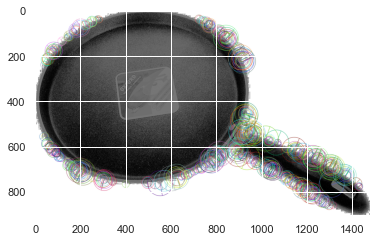

Descripteur :  (500, 32)

[[ 20 184 156 ... 120 131 155]
 [166 237 192 ... 123 240 136]
 [164 237 132 ... 127 210 136]
 ...
 [ 70 237 214 ... 123 209 128]
 [ 98 168 212 ...   8  97 136]
 [182 173 198 ... 123 113 128]]


In [89]:
import cv2

orb = cv2.ORB_create()
image = cv2.imread(path+list_photos[1], 0)
image = cv2.equalizeHist(image)   
kp, des = orb.detectAndCompute(image, None)
img = cv2.drawKeypoints(image, kp, image,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)
plt.show()
print("Descripteur : ", des.shape)
print()
print(des)

* L'image contient 500 descripteurs
* Chaque descripteur est un vecteur de longueur 32

In [ ]:
On prend l’image de la requête et on la convertit en niveaux de gris.
On initialise le détecteur ORB et détecte les points clés dans l’image et la scène de la requête.
On calcule les descripteurs appartenant aux deux images.

# Création de descripteurs

Pour chaque image, nous égalisons et convertissons en gris
Nous créons une liste de descripteurs par mage ("orb_keypoints_by_img") qui sera utilisée pour réaliser l’histogramme de l’image, ainsi qu'une liste de descriptions pour toutes les images ('orb_keypoints_all') qui sera utilisée pour créer des clusters desriptors

In [90]:
import time, cv2
orb_keypoints = []
temps1 = time.time()
orb = cv2.ORB_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num], 0) # convert in gray
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints, dtype="object")

orb_keypoints_all  = np.concatenate(orb_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1 = time.time() - temps1
print("Temps de traitement du descripteur ORB : ", "%15.2f" % duration1, "seconds")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (520145, 32)
Temps de traitement du descripteur ORB :            49.39 seconds


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [91]:
from sklearn import cluster, metrics

# Determination du nombre de clusters
temps1=time.time()

k = int(round(np.sqrt(len(orb_keypoints_all)),0))
print("Nombre estimé de clusters : ", k)
print("Creation des",k, "clusters des descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(orb_keypoints_all)

duration1=time.time()-temps1
print("Temps de traitement du Kmeans: ", "%15.2f" % duration1, "seconds")

Nombre estimé de clusters :  721
Creation des 721 clusters des descripteurs ...
Temps de traitement du Kmeans:             8.22 seconds


## Création des features des images
* Pour chaque image : 
   - On prédit des numéros de cluster de chaque descripteur
   - On crée un histogramme de comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [92]:
# Creation des histogrammes (features)
temps1 = time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(des)
    if nb_des == 0 : print("Probleme image histogramme: ", image_num)
    for i in res:
        hist[i] += 1.0 / nb_des
    return hist


# Creation de la matrice des histogrammes
hist_vectors = []

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #On calcule l'histogramme
    hist_vectors.append(hist) #histogram est le vecteur feature

im_features = np.asarray(hist_vectors)

duration1 = time.time() - temps1
print("Temps de création des histogrammes : ", "%15.2f" % duration1, "seconds")

0
100
200
300
400
500
600
700
800
900
1000
Temps de création des histogrammes :           323.94 seconds


### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99% dans notre cas)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [93]:
from sklearn import manifold, decomposition

print("Dimensions du dataset avant la décomposition PCA: ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(im_features)
print("Dimensions du dataset après la décomposition PCA: ", feat_pca.shape)

Dimensions du dataset avant la décomposition PCA:  (1050, 721)
Dimensions du dataset après la décomposition PCA:  (1050, 579)


In [94]:
>>> from sklearn.cluster import KMeans

model = KMeans(n_clusters=7,
               max_iter=1000,
               n_init=10,
               random_state=123)

model.fit(feat_pca)

KMeans(max_iter=1000, n_clusters=7, random_state=123)

### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

C:\Users\nha5600\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Visualisation de la réparition des catégories de produit


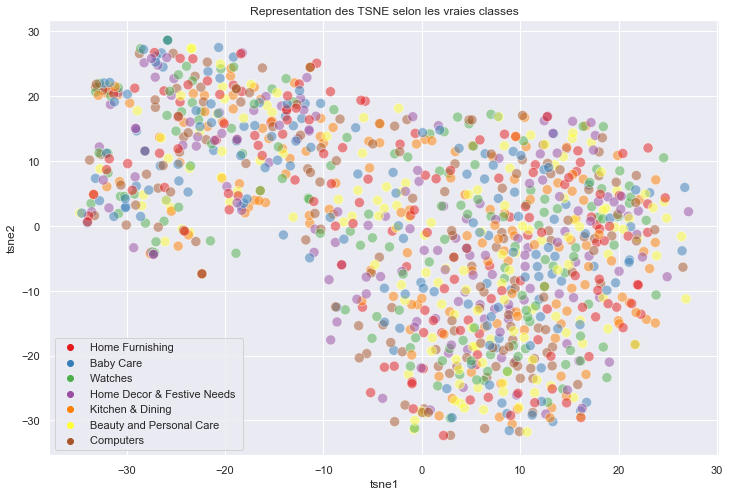

In [95]:
tsne = manifold.TSNE(n_components=2,
                     perplexity=30, 
                     n_iter=2000,
                     init='random',
                     random_state=123)

X_tsne = tsne.fit_transform(feat_pca)

print('Visualisation de la réparition des catégories de produit')
cluster_labels = df.loc[:, 'category_1']
# Plot creation
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0],
                y=X_tsne[:, 1],
                hue=cluster_labels,
                legend="brief",
                s=100,
                alpha=.5,
                palette='Set1'
                )
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.title("Representation des TSNE selon les vraies classes")
plt.legend()
plt.show()

La visualisation n'est pas optimale...

Visualisation du clustering


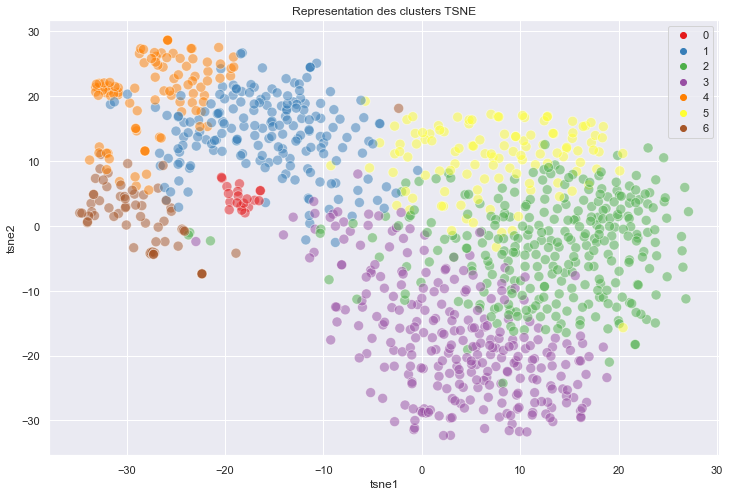

ARI:  0.0008031609177237766


In [96]:
print('Visualisation du clustering')
cluster_labels = model.labels_

# Plot creation
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0],
                y=X_tsne[:, 1],
                hue=cluster_labels,
                legend="brief",
                s=100,
                alpha=.5,
                palette='Set1'
                )
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.title("Representation des clusters TSNE")
plt.legend()
plt.show()

labels = df['categ']
print("ARI: ", metrics.adjusted_rand_score(df['categ'], model.labels_))

### Analyse par classes
* La matrice de confusion doit être transformée pour mettre avoir en colonne le même ordre des catégories supposées qu'en ligne

In [97]:
df['cluster_ORB'] = model.labels_

On essaye d'avoir le nombre de produits par clusters :

In [98]:
df.groupby("cluster_ORB").count()['categ']

cluster_ORB
0     20
1    185
2    299
3    273
4     95
5    116
6     62
Name: categ, dtype: int64

On établit la matrice de confusion :

In [99]:
conf_mat = metrics.confusion_matrix(labels, model.labels_)
print(conf_mat)

[[ 3 31 40 33 19 15  9]
 [ 3 25 48 49  6 10  9]
 [ 0 25 35 47 14 19 10]
 [ 3 24 44 38 14 18  9]
 [ 3 33 41 39 12 16  6]
 [ 7 27 51 28 12 18  7]
 [ 1 20 40 39 18 20 12]]


On calcule les métriques nécessaires à notre analyse :

In [100]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    #corresp = np.argmax(conf_mat, axis=0)
    corresp = [2, 3, 0, 6, 5, 1, 4]
    print ("Cluster correspondance : ", corresp)

    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, model.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Cluster correspondance :  [2, 3, 0, 6, 5, 1, 4]
[[40 15  3 31  9 19 33]
 [48 10  3 25  9  6 49]
 [35 19  0 25 10 14 47]
 [44 18  3 24  9 14 38]
 [41 16  3 33  6 12 39]
 [51 18  7 27  7 12 28]
 [40 20  1 20 12 18 39]]

              precision    recall  f1-score   support

           0       0.13      0.27      0.18       150
           1       0.09      0.07      0.08       150
           2       0.00      0.00      0.00       150
           3       0.13      0.16      0.14       150
           4       0.10      0.04      0.06       150
           5       0.13      0.08      0.10       150
           6       0.14      0.26      0.18       150

    accuracy                           0.12      1050
   macro avg       0.10      0.12      0.11      1050
weighted avg       0.10      0.12      0.11      1050



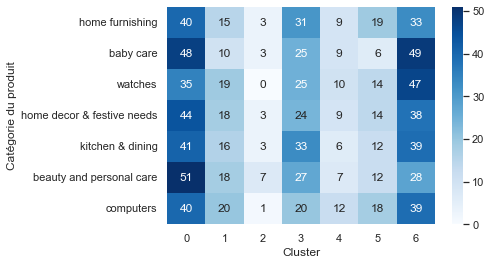

In [101]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.xlabel("Cluster")
plt.ylabel('Catégorie du produit')
plt.show()

# CNN - Transfer Learning

On crée le modele avec VGG16() (implémenté par Keras)

In [102]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

On crée une fonction de preprocessing et prédiction des caractéristiques à partir du modèle.

VGG16 doit avoir une image 224x224 

In [103]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

def preprocess_VGG16(img):
    img = load_img(img, target_size=(224,224)) 
    img = np.array(img) 
    img = img.reshape(1,224,224,3) 
    img = preprocess_input(img) #for VGG16
    return img

def model_vgg16(img, model=model):
    features = model.predict(img, use_multiprocessing=True)
    return features

On entraine l'image:

In [104]:
df['path'] = df['image'].apply(lambda x: r'C:\Users\nha5600\Desktop\Flipkart\Images\\'+str(x))

On extrait les features :

In [105]:
df['resize_VGG16'] = df['path'].apply(preprocess_VGG16)
df['preprocess_VGG16'] = df['resize_VGG16'].apply(model_vgg16)

C:\Users\nha5600\Anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


On évalue le shape des features du dataset

In [106]:
vgg16_feat = np.array(df['preprocess_VGG16'].values.tolist())
print('Shape:', vgg16_feat.shape)
vgg16_feat = vgg16_feat.reshape(-1, vgg16_feat.shape[2])
print('ReShape:', vgg16_feat.shape)

Shape: (1050, 1, 4096)
ReShape: (1050, 4096)


On effectue une visusalisation 2D grâce aux réductions de dimensions PCA et T-SNE 

# PCA

In [107]:
print("Dataset dimensions avant PCA: ", vgg16_feat.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(vgg16_feat)
print("Dataset dimensions après PCA: ", feat_pca.shape)

Dataset dimensions avant PCA:  (1050, 4096)
Dataset dimensions après PCA:  (1050, 803)


# T-SNE

On continue la réduction dimensionnelle avec le TSNE. On choisit 2 composantes :

C:\Users\nha5600\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1050, 3)


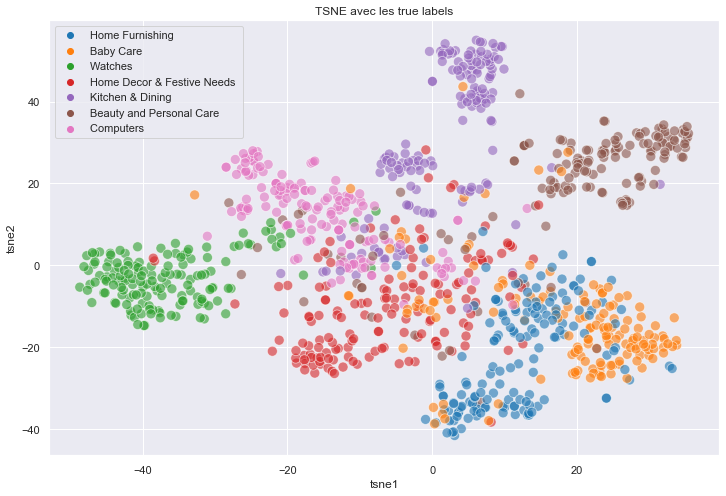

In [108]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2,
                     perplexity=30, 
                     n_iter=2000,
                     init='random',
                     random_state=6)

X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:, 0:2],
                       columns=['tsne1', 'tsne2'])

df_tsne['label'] = df['category_1']
print(df_tsne.shape)

plt.figure(figsize=(12, 8))
sns.scatterplot(x="tsne1",
                y="tsne2",
                hue="label",
                data=df_tsne,
                legend="brief",
                palette=sns.color_palette('tab10', n_colors=7),
                s=100,
                alpha=0.6)

plt.title('TSNE avec les true labels')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.legend() 

plt.show()

# # CLustering 

On effectue notre clustering avec un nombre de clusters égal à 7.

In [109]:
cls = cluster.KMeans(n_clusters=7,
                     random_state=123)
cls.fit(X_tsne)

df_tsne['cluster'] = cls.labels_
print(df_tsne.shape)

(1050, 4)


# Cluster visualisation

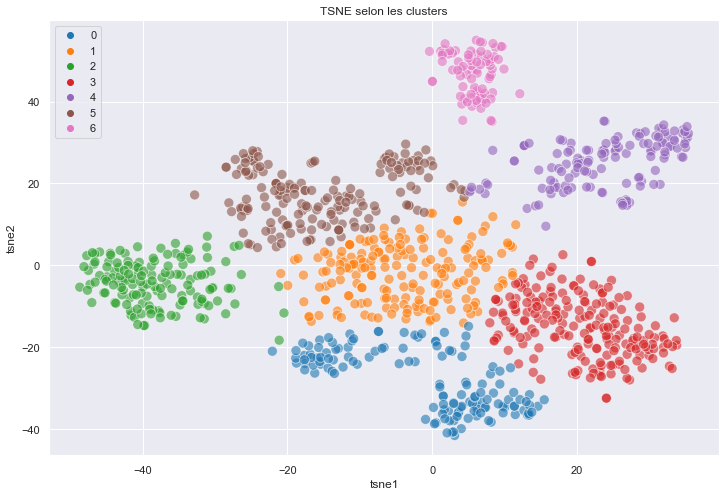

ARI:  0.44292831456117726


In [110]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="tsne1",
                y="tsne2",
                hue='cluster',
                palette=sns.color_palette('tab10', n_colors=7),
                s=100,
                alpha=0.6,
                data=df_tsne,
                legend="brief")

plt.title('TSNE selon les clusters')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.legend() 

plt.show()

labels = df['categ']
print("ARI: ", metrics.adjusted_rand_score(df['categ'], cls.labels_))

In [111]:
df['cluster_CNN'] = cls.labels_

In [112]:
df.groupby("cluster_CNN").count()['categ']

cluster_CNN
0    137
1    185
2    143
3    200
4    132
5    173
6     80
Name: categ, dtype: int64

In [113]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    #corresp = [2, 3, 0, 6, 5, 1, 4]
    print ("Cluster correspondance : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(df['categ'], cls.labels_)
conf_mat = metrics.confusion_matrix(df['categ'], cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(df['categ'], cls_labels_transform))

Cluster correspondance :  [4 3 6 0 1 2 5]
[[110   4   3  24   8   1   0]
 [  5 117   6  16   4   1   1]
 [  1   1 105  42   0   0   1]
 [  5   1   7  72  59   0   6]
 [ 79   0   0   5  66   0   0]
 [  0   9  39  24   0  78   0]
 [  0   0  13   2   0   0 135]]

              precision    recall  f1-score   support

           0       0.55      0.73      0.63       150
           1       0.89      0.78      0.83       150
           2       0.61      0.70      0.65       150
           3       0.39      0.48      0.43       150
           4       0.48      0.44      0.46       150
           5       0.97      0.52      0.68       150
           6       0.94      0.90      0.92       150

    accuracy                           0.65      1050
   macro avg       0.69      0.65      0.66      1050
weighted avg       0.69      0.65      0.66      1050



Des bons scores sont observés pour le CNN Transfer Learning.

# Evaluation du clustering

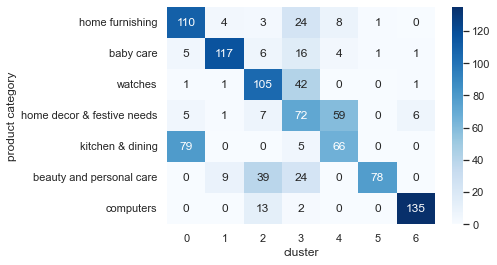

In [114]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues",  fmt='.0f')
plt.xlabel("cluster")
plt.ylabel('product category')
plt.show()

On utilise donc la fonctionnalité extraite d’un VGG16 CNN pré-dessiné donnant des résultats (ARI = 0.44 et Accuracy = 0.65) qui vont en faveur d’une classification par image

La mise en place d'un moteur de classification des articles en différentes catégories, est faisable.
La méthode Transfer learning donne un meilleur résultat de classification avec un minimum de temps et d'effort de développement.
L'utilisation de la couche classifier de VGG16 et l'entrainer sur nos images permettra d'avoir de meilleurs résultats.